In [1]:
using Plots
using Distributions
using SpecialFunctions  # Add this to access the gamma function

In [2]:
include("distributions/Nakagami.jl")

fit_mle (generic function with 62 methods)

In [3]:
# Generate or import your small scale fading data
# Example: fadingData = randn(1000); # Replace this with your actual data
fadingData = randn(1000)

# Ensure data is non-negative for Nakagami distribution
fadingData = abs.(fadingData);

In [4]:
x = range(minimum(fadingData), stop=maximum(fadingData), length=100);

In [5]:
# Fit Rayleigh distribution
rayleighDist = fit_mle(Rayleigh, fadingData)
pdf_rayleigh = pdf.(rayleighDist, x);

In [6]:
# Fit Ricean distribution
# Using a rough approximation for initial parameters
s = √(mean(fadingData.^2) / 2) # Approximate s
σ = std(fadingData) # Approximate σ
riceanDist = Rician(s, σ)
pdf_ricean = pdf.(riceanDist, x);

In [7]:
# Fit Nakagami distribution
nakagamiDist = fit_mle(Nakagami, fadingData)
pdf_nakagami = pdf.(nakagamiDist, x);

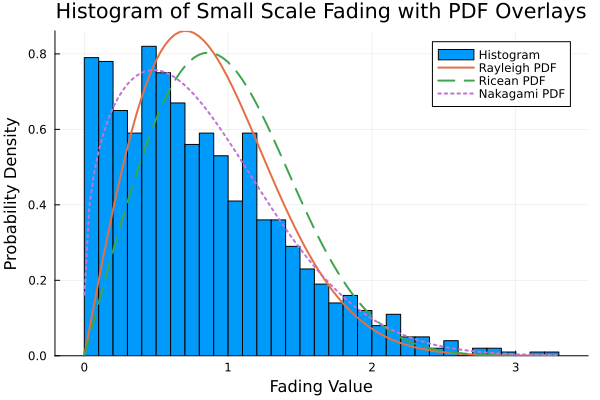

In [8]:
# Plot the histogram of the fading data
plot(
      title = "Histogram of Small Scale Fading with PDF Overlays"
    , xlabel = "Fading Value", ylabel = "Probability Density"
)
histogram!(fadingData, normalize=true, bins=50, label="Histogram", legend=:topright)
plot!(x, pdf_rayleigh, label="Rayleigh PDF", linewidth=2)
plot!(x, pdf_ricean, label="Ricean PDF", linewidth=2, linestyle=:dash)
plot!(x, pdf_nakagami, label="Nakagami PDF", linewidth=2, linestyle=:dot)


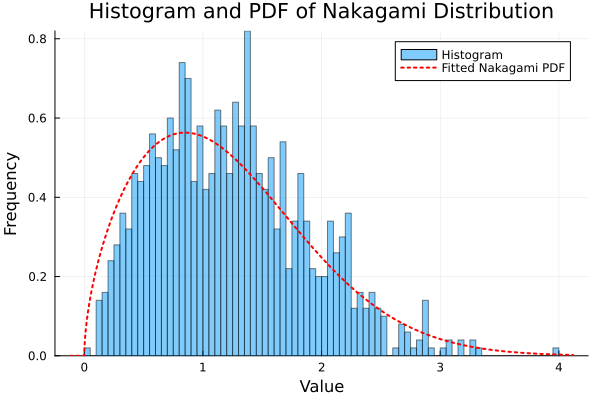

In [9]:
# Generate Nakagami-distributed data
μ = 1.0  # Shape parameter
ω = 2.0  # Spread parameter
nakagami_dist = Nakagami(μ, ω)
data = rand(nakagami_dist, 1000)

# Plot the histogram of the data
histogram(data, bins=100, label="Histogram", xlabel="Value", ylabel="Frequency", title="Histogram and PDF of Nakagami Distribution", alpha=0.5, normalize=true)

# Overlay the fitted PDF
x = range(0, maximum(data), length=1000)

# Fit Nakagami distribution to the data
nakagami_fit = fit(Nakagami, data)
plot!(x -> pdf(nakagami_fit, x)
    , label="Fitted Nakagami PDF"
    , linewidth=2, linestyle=:dot
    , color=:red
)

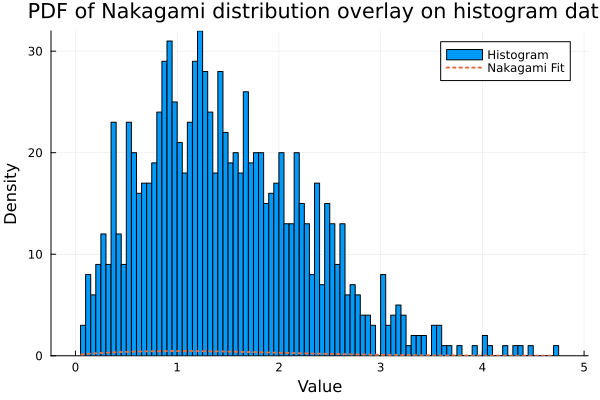

In [15]:
# Example: Create a Nakagami distribution with specific parameters
μ = 1.0  # Shape parameter
ω = 3.0  # Spread parameter
nakagami_dist = Nakagami(μ, ω)

# Generate example data from the Nakagami distribution
data = rand(nakagami_dist, 1000)

# Fit Nakagami distribution to the data
nakagami_fit = fit_mle(Nakagami, data)

# Generate histogram data
histogram(data, nbins=100, density=true, label="Histogram", xlabel="Value", ylabel="Density", title="PDF of Nakagami distribution overlay on histogram data")

# Overlay the fitted Nakagami PDF
x_vals = range(minimum(data), stop=maximum(data), length=100)
pdf_vals = pdf(nakagami_fit, x_vals)
plot!(x_vals, pdf_vals, linewidth=2, linestyle=:dot, label="Nakagami Fit")